# Numerisk derivasjon
Derivasjon har mange nyttige anvendelser
- Hva den deriverte __er__ kan du lære i et matematikkfag
- Eksempler på bruk kan du se i naturfag, ingeniørfag, økonomi etc. 

Her skal vi derimot se på hvordan den deriverte kan beregnes numerisk.

## Numerisk derivasjon med kjent funksjonsuttrykk (analytisk)
I første omgang bruker vi en svært enkel funksjon som eksempel: $f(x) = \frac{1}{3}x^3 - x$

Denne kan greit deriveres symbolsk: $f'(x) = x^2 - 1$. 


<function matplotlib.pyplot.show(close=None, block=None)>

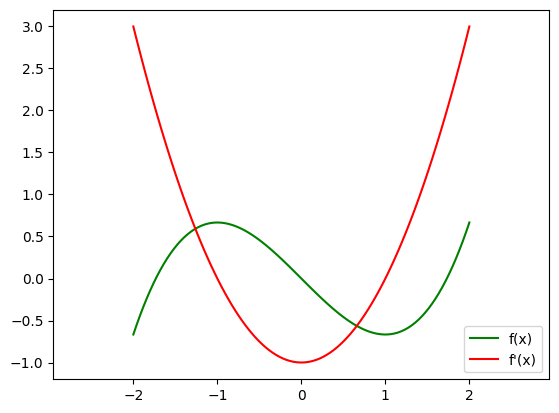

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1/3)*x**3 - x

def f_der(x):
    return x**2 - 1

x = np.linspace(-2, 2, 100)
y = f(x)
y_der = f_der(x)

fig, ax = plt.subplots()
ax.axis("equal") # lik skala på x- og y-akse
ax.plot(x, y, label='f(x)', color="green")
ax.plot(x, y_der, label="f'(x)", color="red")
ax.legend()
plt.show


Men numerisk derivasjon har mange fordeler:
- kan regne ut derivert for funksjoner som er vanskelige å derivere symbolsk
- kan regne ut derivert selv om vi __ikke__ kjenner funksjonsuttrykket
    - f.eks. har en serie måleresultater over et tidsintervall
    - uten å vite hvilken funksjon f(t) måleverdiene følger

## Numerisk beregning av den deriverte
En tilnærmet verdi for den deriverte kan finnes ved å se på 
- stigningen av funksjonen fra ønsket x-verdi og til en nærliggende x-verdi
- Intervallet mellom x-verdi og den nærliggende verdien kalles gjerne __h__ (eller __dx__) i kode for numeriske beregninger.

Tre ulike formler:
- den venstrederiverte: $f'(x) = \frac{f(x) - f(x-dx)}{dx}$

- den høyrederiverte: $f'(x) = \frac{f(x+dx) - f(x)}{dx}$

- den sentralderiverte: $f'(x) = \frac{f(x+dx) - f(x-dx)}{2dx}$

![](../../images/derivatives.jpg)

Koden under plotter høyre-, venstre- og sentral deriverte __numerisk__:

<function matplotlib.pyplot.show(close=None, block=None)>

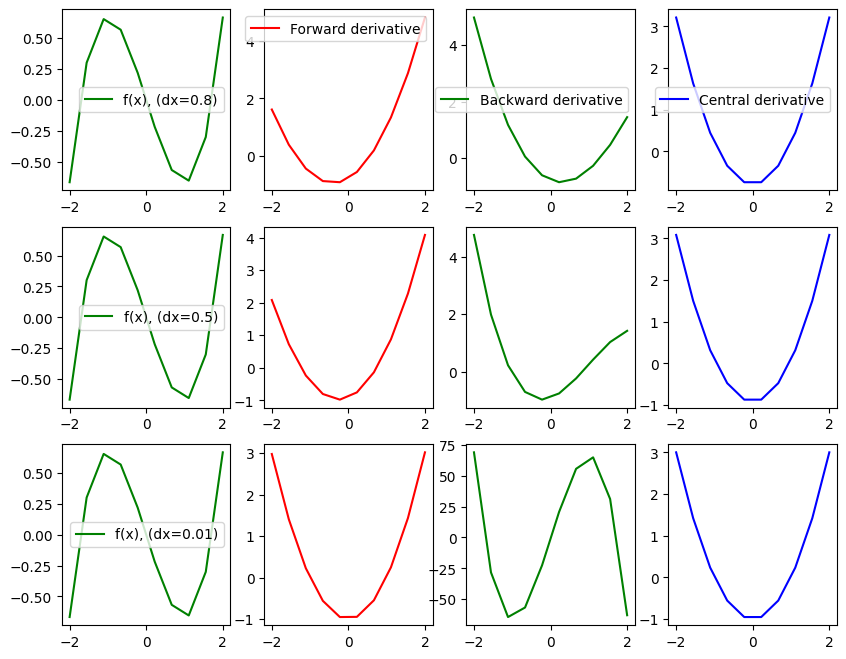

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1/3)*x**3 - x

def ff_der(x, dx):
    '''Forward difference approximation of the derivative'''
    return (f(x + dx) - f(x))/dx


def fb_der(x, dx):
    '''Backward difference approximation of the derivative'''
    return f(x)-(f(x - dx))/dx


def fc_der(x, dx):
    '''Central difference approximation of the derivative'''
    return (f(x + dx) - f(x-dx))/(2*dx)


x = np.linspace(-2, 2, 10)
y = f(x)


fig, ax = plt.subplots(3,4)
fig.set_size_inches(10,8)

dx = 0.8
ax[0,0].plot(x, y, label=f'f(x), (dx={dx})', color="green")
ax[0,0].legend()
ax[0,1].plot(x, ff_der(x,dx), label="Forward derivative", color="red")
ax[0,1].legend()
ax[0,2].plot(x, fb_der(x,dx), label="Backward derivative", color="green")
ax[0,2].legend()
ax[0,3].plot(x, fc_der(x,dx), label="Central derivative", color="blue")
ax[0,3].legend()

dx = 0.5
ax[1,0].plot(x, y, label=f'f(x), (dx={dx})', color="green")
ax[1,0].legend()
ax[1,1].plot(x, ff_der(x,dx), color="red")
ax[1,2].plot(x, fb_der(x,dx), color="green")
ax[1,3].plot(x, fc_der(x,dx), color="blue")


dx = 0.01
ax[2,0].plot(x, y, label=f'f(x), (dx={dx})', color="green")
ax[2,0].legend()
ax[2,1].plot(x, ff_der(x,dx), color="red")
ax[2,2].plot(x, fb_der(x,dx), color="green")
ax[2,3].plot(x, fc_der(x,dx), color="blue")

plt.show

Sentralderiverte normalt mest nøyaktig

Altså, mindre verdi for h gir mer nøyaktig svar for numerisk derivasjon.

Et naturlig spørsmål da er: __Hvordan oppnå størst mulig nøyaktighet?__

Mer spesifikt kunne vi tenke:
- Hvorfor prøve med gradvis mindre verdier?
- Hvorfor ikke bare klinke til med minst mulig verdi for h?

In [4]:
import sys
x = -1.0
h = sys.float_info.min # aller minste verdi for float, ca. 2.22 * 10**(-308)
print(f"h = {h}; f'({x}) = {(f(x+h)-f(x-h))/(2*h):.8f}")
print(f"Analytisk korrekt svar: {x**2-1}")

h = 2.2250738585072014e-308; f'(-1.0) = 0.00000000
Analytisk korrekt svar: 0.0


Dette ser jo bra ut! Vi fikk 0.0, som er riktig svar. Men hva om vi prøver samme h-verdi for andre x-verdier?

In [5]:
import sys
x = -0.5
h = sys.float_info.min # aller minste verdi for float
print(f"h = {h}; f'({x}) = {(f(x+h)-f(x-h))/(2*h):.8f}")
print(f"Analytisk korrekt svar: {x**2-1}")

h = 2.2250738585072014e-308; f'(-0.5) = 0.00000000
Analytisk korrekt svar: -0.75


Med veldig små verdier for h kan vi enten oppleve
- __underflyt__: verdien for $f(x+h) - f(x-h)$ blir mindre enn det minste tallet vi kan representere, blir da feilaktig 0.0
- __økende avrundingsfeil__: dette blir subtraksjon av to nesten like tall, hvor vi bare sitter igjen med de bakerste usikre sifrene

Under kjører vi ei løkke hvor vi
- reduserer verdien til h med en tierpotens per runde
- skriver ut resultat for derivasjonen, samt avvik fra analytisk korrekt svar

In [6]:
def f(x):
    return (1/3)*x**3 - x

def sentral_deriv(f, x, h):
    # Regner ut f'(x) med intervallstørrelse h
    return (f(x+h) - f(x-h)) / (2*h)

x = -0.5
korrekt_svar = x**2 - 1
print( '   h\t\tRESULTAT\t\tFEIL')
for i in range(20):
    h = 10**(-i)
    result = sentral_deriv(f, x, h)
    error = abs(korrekt_svar - result)
    print(f'{h:6}\t\t{result:.12f}\t\t{error:.5e}')

   h		RESULTAT		FEIL
     1		-0.416666666667		3.33333e-01
   0.1		-0.746666666667		3.33333e-03
  0.01		-0.749966666667		3.33333e-05
 0.001		-0.749999666667		3.33333e-07
0.0001		-0.749999996666		3.33353e-09
 1e-05		-0.749999999966		3.39445e-11
 1e-06		-0.750000000022		2.15667e-11
 1e-07		-0.749999999883		1.17211e-10
 1e-08		-0.750000000993		9.93012e-10
 1e-09		-0.750000006544		6.54413e-09
 1e-10		-0.750000062055		6.20553e-08
 1e-11		-0.750000062055		6.20553e-08
 1e-12		-0.749983408710		1.65913e-05
 1e-13		-0.749955653134		4.43469e-05
 1e-14		-0.749400541622		5.99458e-04
 1e-15		-0.749400541622		5.99458e-04
 1e-16		-0.832667268469		8.26673e-02
 1e-17		0.000000000000		7.50000e-01
 1e-18		0.000000000000		7.50000e-01
 1e-19		0.000000000000		7.50000e-01


For dette eksemplet ser vi at
- for h = 1 blir svaret helt feil
- innledningsvis blir feilen vesentlig mindre ved minkende h
- største nøyaktighet oppnås for h=1e-06 (h=0.000001)
    - feilen da 2.15667e-11 (0.0000000000215667)
- deretter blir svaret gradvis mindre nøyaktig igjen
    - avrundingsfeil pga subtraksjon av nesten like tall
- fra og med h=1e-17 får vi 0.0 som er helt feil

En ytterligere feilkilde er hvis vi velger en __h som ikke lar seg representere eksakt__.
- datamaskinen bruker det binære tallsystemet
- 0.1, 0.001, osv. er lett å representere eksakt i det desimale systemet
    - men i binært tallsystem har disse tallene uendelig mange desimaler og gir dermed i seg selv avrundingsfeil
    
_Kan vi oppnå en forbedring ved i stedet å lage små verdier for h hvor nevner er en toerpotens, slik at h kan representeres eksakt?_

Nedenfor prøver i samme løkke som over, men med $h=8^{(-i)}$ i stedet for $h=10^{(-i)}$. Siden 8 er en toerpotens ($2^3$), vil de suksessivt mindre verdiene for h nå la seg representere eksakt.

In [2]:
def f(x):
    return (1/3)*x**3 - x

def sentral_deriv(f, x, h):
    # Regner ut f'(x) med intervallstørrelse h
    return (f(x+h) - f(x-h)) / (2*h)

x = -0.5
korrekt_svar = x**2 - 1
print( '   h\t\tRESULTAT\t\tFEIL')
for i in range(20):
    h = 8**(-i)
    result = sentral_deriv(f, x, h)
    error = abs(korrekt_svar - result)
    print(f'{h:.4e}\t\t{result:.12f}\t\t{error:.9e}')

   h		RESULTAT		FEIL
1.0000e+00		-0.416666666667		3.333333333e-01
1.2500e-01		-0.744791666667		5.208333333e-03
1.5625e-02		-0.749918619792		8.138020833e-05
1.9531e-03		-0.749998728434		1.271565750e-06
2.4414e-04		-0.749999980132		1.986825282e-08
3.0518e-05		-0.749999999690		3.101376933e-10
3.8147e-06		-0.749999999993		7.275957614e-12
4.7684e-07		-0.750000000000		0.000000000e+00
5.9605e-08		-0.750000000000		0.000000000e+00
7.4506e-09		-0.750000000000		0.000000000e+00
9.3132e-10		-0.750000000000		0.000000000e+00
1.1642e-10		-0.750000000000		0.000000000e+00
1.4552e-11		-0.750000000000		0.000000000e+00
1.8190e-12		-0.750000000000		0.000000000e+00
2.2737e-13		-0.750000000000		0.000000000e+00
2.8422e-14		-0.750000000000		0.000000000e+00
3.5527e-15		-0.750000000000		0.000000000e+00
4.4409e-16		-0.750000000000		0.000000000e+00
5.5511e-17		0.000000000000		7.500000000e-01
6.9389e-18		0.000000000000		7.500000000e-01


Som vi ser, ga dette en klar forbedring. Vi får kjapere mindre feil og havner etter hvert på helt riktig svar. Her får vi fornuftige resultat for h helt ned mot e-16, men blir h liten nok, får vi samme problem som før med at svaret blir null.

Konklusjon:
- ved numerisk derivasjon lønner det seg å bruke en liten verdi for h
- men ikke __for__ liten, da dette igjen kan gi større avrundingsfeil, eller i verste fall underflyt til 0.0. 
    - Hvis du bruker verdier som ikke lar seg representere eksakt, kan ca. 1e-6 ofte være passende
    - hvis du står fritt til å velge verdi for h, velg en h som lar seg representere eksakt
        - heltallsbrøk hvor nevner er en toerpotens
- hva som er optimalt for h kan være litt avhengig av type funksjon
- __VIKTIG Å TESTE__ at koden din gir nøyaktige svar for flere ulike x-verdier

## Numerisk derivasjon uten kjent funksjonsuttrykk
I dette tilfellet kjenner vi ikke funksjonsuttrykket
- men har f.eks. bare en serie måleresultat

Antar her at vi har en numpy-array med to rader, hvor
- første rad er en jevn serie av verdier
    - f.eks. t-verdier hvis vi gjorde målinger med jevne tidsintervall
- andre rad er de målte verdiene
    - f.eks. trykk, temperatur, fart, ... alt etter hva målingen handlet om
    
Her trenger vi ikke i samme grad lure på hvilken h vi skal bruke
- har uansett bare de tallene vi har
- like greit å bruke korteste intervall
    - med mindre de er kortere enn $10^{-6}$

In [ ]:
# Eksempel, vi har noen måledata i arrayet M
# anta at første rad av M er tid, dvs. vi har målt noe hvert 0.1 sek.
# andre rad av M er hva vi målte, f.eks. fart, 0.0, 0.93..., 1.55... osv.
import numpy as np
maalinger = np.array([[0.        , 0.1       , 0.2       , 0.3       , 0.4       ,
        0.5       , 0.6       , 0.7       , 0.8       , 0.9       ,
        1.        , 1.1       , 1.2       , 1.3       , 1.4       ,
        1.5       , 1.6       , 1.7       , 1.8       , 1.9       ,
        2.        , 2.1       , 2.2       , 2.3       , 2.4       ,
        2.5       , 2.6       , 2.7       , 2.8       , 2.9       ,
        3.        ],
       [0.        , 0.93265222, 1.55794558, 1.85943577, 1.95991607,
        1.96171118, 1.92202926, 1.86884143, 1.81510765, 1.76662195,
        1.7258473 , 1.69373523, 1.67059136, 1.65649362, 1.65150034,
        1.65576025, 1.6695787 , 1.69346785, 1.72819658, 1.77485108,
        1.83491599, 1.91038826, 2.0039406 , 2.11916132, 2.26091352,
        2.43588745, 2.6534766 , 2.92722   , 3.27728624, 3.73499307,
        4.35161217]])

In [ ]:
#for syns skyld plotter vi også dataene
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(maalinger[0], maalinger[1])
plt.show()

Vi aner ikke hva slags funksjon dette er, men kan likevel derivere:
- for den første t-verdien (0.0) må vi bruke høyrederivert
    - siden vi ikke kjenner måleverdien til venstre
    - resultat blir (M[1,1]-M[1,0]) / (M[0,1]-M[0,0])
- for den siste t-verdien (3.0) må vi bruke venstrederivert
    - siden vi ikke kjenner måleverdi til høyre
    - resultat blir (M[1,-1]-M[1.-2]) / (M[0,-1]-M[0,-2])
- for øvrige verdier kan vi bruke sentralderivert
    - resultat: (M[1,i+1]-M[1,i-1]) / (M[0,i+1]-M[0,i-1]) for derivert av i'te måleverdi
    
En Python-funksjon for dette blir som nedenfor:

In [ ]:
def deriv(M):
    '''Regner ut numerisk deriverte for et array M hvor rad [0] er x-verdier
       og rad [1] er tilsvarende y-verdier.
       Returnerer et array med verdier for den deriverte'''
    result = np.zeros(len(M[0]))
    result[0] = (M[1,1]-M[1,0]) / (M[0,1]-M[0,0]) # fremste verdi
    result[-1] = (M[1,-1]-M[1,-2]) / (M[0,-1]-M[0,-2])  #  bakerste
    for i in range(1, len(result)-1):
        result[i] =  (M[1,i+1]-M[1,i-1]) / (M[0,i+1]-M[0,i-1])
    return result

# Prøver ut funksjonen på arrayet vi hadde
A = deriv(maalinger)

# Plotter den deriverte sammen med måledataene
fig, ax = plt.subplots()
ax.plot(maalinger[0], maalinger[1])
ax.plot(maalinger[0], A)
plt.show()

For å teste funksjonen på noe hvor vi vet svaret
- prøver vi også en sinusfunksjon fra 0 til 2 pi
- vet da at den deriverte skal være en cosinusfunksjon fra 0 til 2 pi

In [ ]:
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)
M = np.array((x,y))
A = deriv(M)

# Plotter funksjon og derivert funksjon
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, A)
plt.show()

Grafisk ser dette bra ut, den resulterende kurven for den deriverte fremstår som en cosinuskurve